# Lecture 2

### Review

##### One - sided derivative

Fractional error - $\sqrt{e_m}$

##### Two - sided derivative

Fractional error - $e_m^{2/3}$

$$
f'(x) \sim \frac{f(x+h) - f(x-h)}{2h} 
$$

where $h$ is small. This is symmetric and works from both sides. Will use Taylor expansion to evaluate these functions.

$$
f(x+h) = f(x) + hf'(x) + \frac{1}{2}h^2f''(x) + \frac{1}{6}h^3f'''(x) + ...
$$

and the other side

$$
f(x-h) = f(x) - hf'(x) + \frac{1}{2}h^2f''(x) - \frac{1}{6}h^3f'''(x) + ...
$$

so when we subtract the two expansions, more terms dissapear.

Truncation error:
$$
e_t(h) \sim h^2f'''(x)
$$

We find the optimal value for $h$ by minimizing the Total error:
$$
e_{tot} = e_r + e_t
$$

$$
h_{min} \sim \left(\frac{e_mf}{f'''}\right)^{1/3}
$$

Fractional error using $h_{min}$

$$
= \frac{e_r+e_t}{f'} \sim e_m^{2/3}
$$

In [5]:
import math
import matplotlib.pyplot as plt

In [6]:
# differentiate1


def f(x):
    return math.cos(x)

def fp(x):
    return -math.sin(x)

x = 1.0
dx = 1e-3
# One - sided derivative
deriv = (f(x+dx)-f(x))/dx
# x, estimated deriv, actual deriv, difference
print(x, deriv, fp(x), abs(deriv-fp(x)))

1.0 -0.8417409956931188 -0.8414709848078965 0.00027001088522227157


In [7]:
# differentiate2
def f(x):
    return math.cos(x)

def fp(x):
    return -math.sin(x)

x = 1.0
dx = 1e-3
# Two - sided derivative
deriv = (f(x+dx)-f(x-dx))/(2*dx)
print(x, deriv, fp(x), abs(deriv-fp(x)))


1.0 -0.8414708445627084 -0.8414709848078965 1.4024518812938425e-07


<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:38: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:38: SyntaxWarning: invalid escape sequence '\D'
/var/folders/6q/0_6f00ms6zj_w_mww_209f8r0000gn/T/ipykernel_59186/1463338878.py:33: SyntaxWarning: invalid escape sequence '\D'
  ax[0].set(xlabel='$\Delta$x', ylabel='derivative')
/var/folders/6q/0_6f00ms6zj_w_mww_209f8r0000gn/T/ipykernel_59186/1463338878.py:38: SyntaxWarning: invalid escape sequence '\D'
  ax[1].set(xlabel='$\Delta$x', ylabel='|error|')


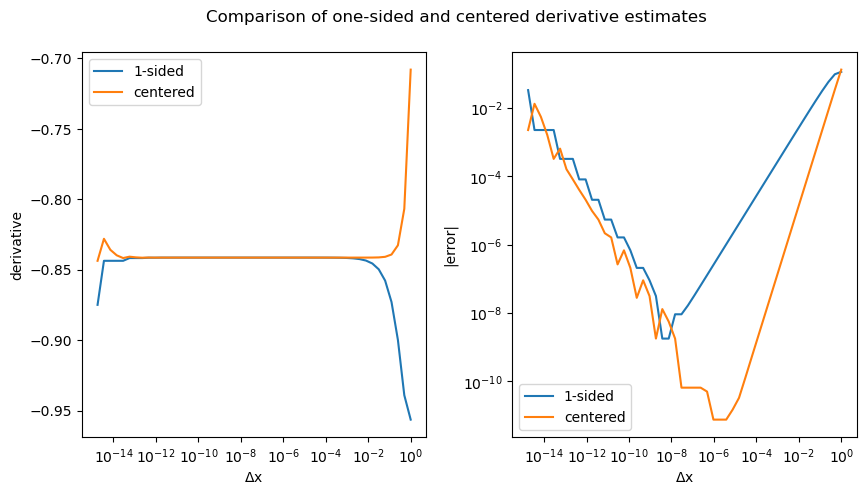

In [9]:
# differentiate3

def f(x):
    return math.cos(x)

def fp(x):
    return -math.sin(x)

dxplot = []
dplot1 = []
dplot2 = []
errplot1 = []
errplot2 = []

x = 1.0
dx = 1.0
while dx > 1.e-15:
    deriv1 = (f(x+dx)-f(x))/dx
    deriv2 = (f(x+dx)-f(x-dx))/(2*dx)
    dxplot.append(dx)
    dplot1.append(deriv1)
    dplot2.append(deriv2)
    errplot1.append(abs(deriv1-fp(x)))
    errplot2.append(abs(deriv2-fp(x)))
    dx /= 2

fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.25)
fig.suptitle('Comparison of one-sided and centered derivative estimates', y=0.965)

ax[0].semilogx(dxplot, dplot1, label='1-sided')
ax[0].semilogx(dxplot, dplot2, label='centered')
ax[0].set(xlabel='$\Delta$x', ylabel='derivative')
ax[0].legend()

ax[1].loglog(dxplot, errplot1, label='1-sided')
ax[1].loglog(dxplot, errplot2, label='centered')
ax[1].set(xlabel='$\Delta$x', ylabel='|error|')
ax[1].legend()

plt.show()


### Automatic Differentiation (AD)

Limitations for finite difference numerical approximations for derivatives
- Numerical / approximation errors
- Poor scalability with dimensions

Consider multivariate function $f(x,y)$

$$
\frac{df}{dx} = \frac{f(x+h, y) - f(x,y)}{h}
$$

$$
\nabla f = f(x+h, y+h), f(x+h, y), f(x, y+h), f(x,y)
$$

So complexity increases like $O(N^2)$. Automatic Differentiation can solve this.

Limitations of AD
- need a basic set of differentiable functions

AD relies on chain rule 

$$
y = f(g(h(x)))
$$

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial y} \frac{\partial f}{\partial g}\frac{\partial g}{\partial h}\frac{\partial h}{\partial x}
$$

Could either do reverse accumulation (backpropogation -> updates Neural Networks)

Or forward accumulation (less used)

In general 

$$
\frac{\partial y}{\partial x} = \frac{\partial y }{\partial \omega_{n-1}} \frac{\partial \omega_{n-1}}{\omega_{n-2}}\frac{\partial \omega_{n-2}}{\partial \omega_{n-3}}.....\frac{\partial \omega_0}{\partial x}
$$

Forward:

First compute $\frac{\partial \omega_0}{\partial x}$

$$
\dot{\omega_i} = \sum_j \frac{\partial \omega_i}{\partial \omega_j}\dot{\omega_j}
$$

Example:

$$
y = x_1x_2 + \sin(x_1)
$$

$$
\frac{\partial y}{\partial x_1} = x_2 + \cos(x_1)
$$

$$
\frac{\partial y}{\partial x_2} = x_1
$$

Computational graph:

!! See notes

$$
\dot{\omega_1} = \frac{\partial \omega_1}{\partial x_1}\dot{x_1} = 1\cdot 1
$$

$$
\dot{\omega_2} = \frac{\partial \omega_2}{\partial x_1}\dot{x_1} = \frac{\partial (x_2)}{\partial x_1}\dot{x_1} = 0
$$

$$
\omega_3 = \omega_1\omega_2
$$

$$
\dot{\omega_3} = \frac{\partial \omega_3}{\partial \omega_2}\dot{\omega_2} + \frac{\partial \omega_3}{\partial \omega_1}\dot{\omega_1}
= \frac{\partial (\omega_1\omega_2)}{\partial \omega_2}\dot{\omega_2} + \frac{\partial (\omega_1\omega_2)}{\partial \omega_1}\dot{\omega_1}
= \omega_1\dot{\omega_2} + \omega_2\dot{\omega_1} = \omega_1 + \omega_2
$$

$$
\omega_4 = \sin \omega_1
$$

$$
\dot{\omega_4} = \frac{\partial \omega_4}{\partial \omega_1}\dot{\omega_1} = \frac{\partial (\sin \omega_1)}{\partial \omega_1}\dot{\omega_1} = \cos \omega_1 
$$

$$
\omega_5 = \omega_4 + \omega_3
$$

$$
\dot{\omega_5} = \frac{\partial \omega_5}{\partial \omega_4}\dot{\omega_4} + \frac{\partial \omega_5}{\partial \omega_3}\dot{\omega_3}
= \dot{\omega_4} + \dot{\omega_3} = \cos \omega_1 + \omega_1 + \omega_2
$$